In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
import torchvision.transforms as transforms
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

In [10]:
# convert data to torch.FloatTensor
transform = transforms.ToTensor()
# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,download=True, transform=transform)

# prepare data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,num_workers=num_workers)

9920512it [00:06, 1480930.91it/s]                             


Extracting data\MNIST\raw\train-images-idx3-ubyte.gz to data\MNIST\raw


32768it [00:00, 60860.93it/s]                           


Extracting data\MNIST\raw\train-labels-idx1-ubyte.gz to data\MNIST\raw


1654784it [00:01, 985352.34it/s]                             


Extracting data\MNIST\raw\t10k-images-idx3-ubyte.gz to data\MNIST\raw


8192it [00:00, 23329.58it/s]            


Extracting data\MNIST\raw\t10k-labels-idx1-ubyte.gz to data\MNIST\raw
Processing...
Done!


In [13]:
# Define the model
class MLPNet(nn.Module):
    def __init__(self):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(28 *28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = x.view(-1, 28 *28)
        x = F.relu(self.fc1(x))
        return x

In [14]:
model = MLPNet()
print(model)

MLPNet(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [15]:
# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [18]:
# Training 
epochs = 30
# Prep model for training
model.train()

for epoch in range(epochs):
    # Resent loss to 0
    train_loss = 0.0
    
    for data, target in train_loader:
        # clearn gradient
        optimizer.zero_grad()
        
        #Forward pass
        output = model(data)
        #Get loss
        loss = criterion(output, target)
        loss.backward() # Backprop
        #Update the parameters 
        optimizer.step()
        #Update running loss
        train_loss += loss.item()*data.size(0)
    # Get avaerage loss
    train_loss = train_loss/len(train_loader.dataset)
    print("Epoch:{} Training loss: {:.6f}".format(epoch +1, train_loss))
    


Epoch:1 Training loss: 0.349125
Epoch:2 Training loss: 0.335656
Epoch:3 Training loss: 0.326057
Epoch:4 Training loss: 0.318754
Epoch:5 Training loss: 0.312946
Epoch:6 Training loss: 0.308178
Epoch:7 Training loss: 0.304166
Epoch:8 Training loss: 0.300728
Epoch:9 Training loss: 0.297734
Epoch:10 Training loss: 0.295094
Epoch:11 Training loss: 0.292743
Epoch:12 Training loss: 0.290628
Epoch:13 Training loss: 0.288712
Epoch:14 Training loss: 0.286964
Epoch:15 Training loss: 0.285361
Epoch:16 Training loss: 0.283881
Epoch:17 Training loss: 0.282511
Epoch:18 Training loss: 0.281235
Epoch:19 Training loss: 0.280044
Epoch:20 Training loss: 0.278927
Epoch:21 Training loss: 0.277878
Epoch:22 Training loss: 0.276889
Epoch:23 Training loss: 0.275954
Epoch:24 Training loss: 0.275069
Epoch:25 Training loss: 0.274228
Epoch:26 Training loss: 0.273429
Epoch:27 Training loss: 0.272667
Epoch:28 Training loss: 0.271939
Epoch:29 Training loss: 0.271244
Epoch:30 Training loss: 0.270578


In [23]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
# Prep for testing
model.eval()

for data, target in test_loader:
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    
    # Convert probabilities to a predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1
# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.273006

Test Accuracy of     0: 98% (962/980)
Test Accuracy of     1: 97% (1110/1135)
Test Accuracy of     2: 88% (917/1032)
Test Accuracy of     3: 90% (914/1010)
Test Accuracy of     4: 92% (910/982)
Test Accuracy of     5: 87% (781/892)
Test Accuracy of     6: 95% (911/958)
Test Accuracy of     7: 91% (945/1028)
Test Accuracy of     8: 88% (864/974)
Test Accuracy of     9: 90% (917/1009)

Test Accuracy (Overall): 92% (9231/10000)


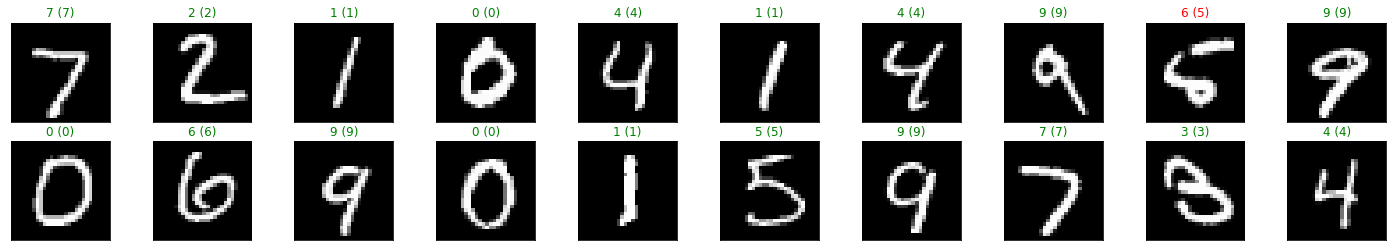

In [24]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))